In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
!pip install yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138938 sha256=0d2b587fffeaa734ea2f9fe44501f4a50e368399c6c1ba7974066e7cb56ce04a
  Stored in directory: c:\users\sruti baibhab mishra\appdata\local\pip\cache\wheels\3e\23\b4\7729b2d48a34ee9d95c11f7f8dfd4ff0571a056e2691118b34
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


In [4]:
import yfinance as yf

In [5]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 10000

stocks = ["RELIANCE.NS", "TCS.NS", "HINDUNILVR.NS", "HDFCBANK.NS", "ITC.NS", "LT.NS", "INFY.NS"]

start_date = "2018-10-01"
end_date = "2023-10-01"

In [6]:
stock_data = {}

for stock in stocks:
  ticker = yf.Ticker(stock)
  stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

In [7]:
stock_prices

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,1099.809204,1991.005859,1501.627686,968.803223,238.439133,1131.947998,642.441345
2018-10-03 00:00:00+05:30,1076.057495,1909.178101,1480.186157,966.756592,236.914261,1129.544800,626.824524
2018-10-04 00:00:00+05:30,1002.079102,1822.627686,1439.132202,931.820740,230.413544,1140.836060,608.497192
2018-10-05 00:00:00+05:30,936.538940,1856.038452,1425.051636,935.414307,221.906464,1113.174438,623.468933
2018-10-08 00:00:00+05:30,990.605225,1833.882446,1425.782837,925.752136,219.258026,1102.245850,614.735474
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,2332.533447,3517.665039,2434.109375,1510.375122,428.591827,2879.861816,1447.156982
2023-09-26 00:00:00+05:30,2334.576416,3526.072754,2437.156738,1516.935547,428.446594,2889.833496,1433.904175
2023-09-27 00:00:00+05:30,2360.887207,3529.613037,2459.572510,1506.281006,434.934540,2941.923828,1440.137817


In [8]:
log_returns = np.log(stock_prices / stock_prices.shift(1))

In [9]:
log_returns

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03 00:00:00+05:30,-0.021833,-0.041967,-0.014382,-0.002115,-0.006416,-0.002125,-0.024609
2018-10-04 00:00:00+05:30,-0.071227,-0.046394,-0.028128,-0.036806,-0.027823,0.009947,-0.029674
2018-10-05 00:00:00+05:30,-0.067641,0.018165,-0.009832,0.003849,-0.037620,-0.024546,0.024307
2018-10-08 00:00:00+05:30,0.056125,-0.012009,0.000513,-0.010383,-0.012007,-0.009866,-0.014107
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.006176,-0.007381,-0.002662,0.000882,-0.001129,-0.005497,-0.014814
2023-09-26 00:00:00+05:30,0.000875,0.002387,0.001251,0.004334,-0.000339,0.003457,-0.009200
2023-09-27 00:00:00+05:30,0.011207,0.001004,0.009155,-0.007049,0.015029,0.017865,0.004338


In [10]:
log_returns = log_returns[1:]

In [11]:
print(log_returns.mean() * NUM_TRADING_DAYS)

RELIANCE.NS      0.153804
TCS.NS           0.113347
HINDUNILVR.NS    0.097715
HDFCBANK.NS      0.089981
ITC.NS           0.120480
LT.NS            0.198878
INFY.NS          0.160276
dtype: float64


In [12]:
print(log_returns.std() * np.sqrt(NUM_TRADING_DAYS))

RELIANCE.NS      0.311704
TCS.NS           0.252949
HINDUNILVR.NS    0.238550
HDFCBANK.NS      0.269939
ITC.NS           0.264995
LT.NS            0.283760
INFY.NS          0.292192
dtype: float64


In [13]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

In [14]:
for _ in range(NUM_SIMULATIONS):
  w = np.random.random(len(stocks))
  w /= np.sum(w)
  portfolio_weights.append(w)
  port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
  portfolio_returns.append(port_return)
  port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
  portfolio_risks.append(port_risk)

In [15]:
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

In [16]:
portfolios = pd.DataFrame({"Return": portfolio_returns, "Risk": portfolio_risks, "Sharpe Ratio": portfolio_returns / portfolio_risks})

In [17]:
portfolios

,Return,Risk,Sharpe Ratio
0,0.132405,0.180144,0.734992
1,0.121285,0.183878,0.659598
2,0.125780,0.178524,0.704554
3,0.131337,0.197568,0.664769
4,0.127944,0.190860,0.670353
...,...,...,...
9995,0.140744,0.194315,0.724309
9996,0.131833,0.182636,0.721834
9997,0.127099,0.182392,0.696844
9998,0.137009,0.191044,0.717159


C:\Users\SRUTI BAIBHAB MISHRA\AppData\Local\Temp\ipykernel_6616\4187909114.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = "Sharpe Ratio")


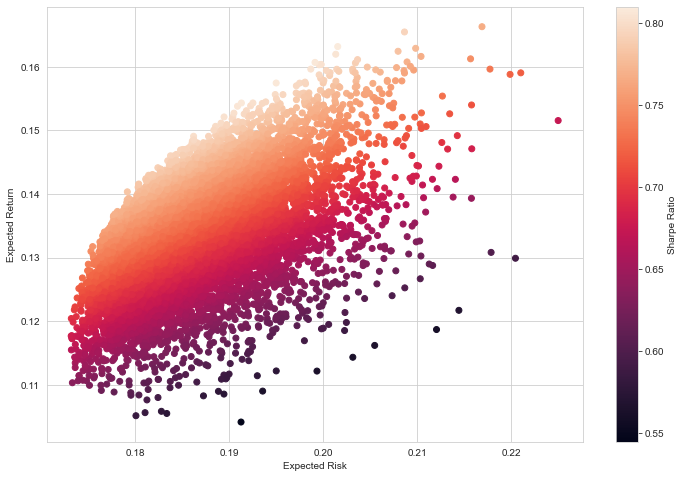

In [18]:
plt.figure(figsize = (12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.show()

In [19]:
sharpe_ratios = portfolio_returns / portfolio_risks

ind = 0

for i in range(len(sharpe_ratios)):
  if sharpe_ratios[i] == np.amax(sharpe_ratios):
    ind = i

In [20]:
sharpe_ratios[ind]

0.8098448354695319

In [21]:
portfolio_returns[ind]

0.1632022313516038